Fitting 3 folds for each of 10 candidates, totalling 30 fits
new hyperparams -  {'n_estimators': 292, 'max_depth': 13}
accuracy - 0.9266666666666666
classifiction report -
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       412
         1.0       0.92      0.88      0.90       389
         2.0       0.89      0.91      0.90       399

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200

confusion matrix - 
[[403   4   5]
 [  7 344  38]
 [  8  26 365]]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

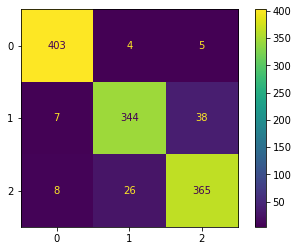

In [2]:
from pandas import read_csv
from sklearn import metrics, model_selection, ensemble
import numpy as np
import matplotlib.pyplot as plt 

#read the training data
path = "TrainingDataMulti.csv"
data = read_csv(path, header=0)
#split the data into the feature columns and the target column (x and y respectively)
x = data[data.columns[:-1]]
y = data["marker"]
#splits the training data into training and testing (80:20 training to testing)
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)
#using a random forest classifier as a different approach using desicion trees
model = ensemble.RandomForestClassifier(random_state=42)
#set up the hyperparameters to be tested
params = {
    #number of trees to be searched through
    'n_estimators': np.random.randint(50,300, size=10),
    #max depth of trees
    'max_depth': np.random.randint(1,20, size=10)
}

#using a randomized search to tune hyperparameters for speed 
randSearch = model_selection.RandomizedSearchCV(model, param_distributions=params, verbose=True, n_iter=10, cv=3)
randSearch.fit(xTrain, yTrain)
#output the new parameters
print('new hyperparams - ',  randSearch.best_params_)
#set the model to use the best possible parameters
newModel = randSearch.best_estimator_
#test the new model on the test data cut from the training data
yPred = newModel.predict(xTest)
#output metrics from the new model
print('accuracy - ' + str(metrics.accuracy_score(yTest, yPred)))
print('classifiction report -\n' + metrics.classification_report(yTest, yPred))
cm = metrics.confusion_matrix(yTest, yPred)
print('confusion matrix - \n' + str(cm))
#display confusion matrix
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2]) 
cmDisplay.plot()
plt.show()

#add the new testing data 
path = "TestingDataMulti.csv"
newdf = read_csv(path, header=0)
#get all the features into the new model
x = newdf[newdf.columns]
#predict the desired values using the new model
newdf['marker'] = newModel.predict(x)
#output the results
newdf.to_csv('TestingResultsMulti.csv', index=False)
